In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import string
import scipy

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

border_width = 0.5
linewidth = 6.202
grey = "#BDBDBD"

sns.set_context("paper", rc={"font.size": 8,
                             "axes.labelsize": 8,
                             "xtick.labelsize": 8,
                             "ytick.labelsize": 8,
                             "legend.fontsize": 8,
                             "legend.title_fontsize": 8,
                             "axes.linewidth": border_width})

ts_green = "#3D8F24"
ts_purple = "#6E38CC"

In [2]:
orig_col_names = ["chrom1", "start1", "end1", "event_id",
             "chrom2", "start2", "end2", "origin_distance"]

timing_col_names = ["chrom1", "start1", "end1", "event_id",
             "chrom2", "start2", "end2", "timing", "n_inter"]

random_orig_col_names = ["chrom1", "start1", "end1",
                         "chrom2", "start2", "end2", "origin_distance"]

random_timing_col_names = ["chrom1", "start1", "end1", 
                           "chrom2", "start2", "end2", "timing", "n_inter"]

orig_df = pd.read_csv("final_population_template_switches.bed.replication_origin",
            delimiter="\t",
            header=None,
            index_col=None,
            names=orig_col_names)

time_df = pd.read_csv("final_population_template_switches.bed.replication_timing",
            delimiter="\t",
            index_col=None,
            header=None,
            names=timing_col_names)

random_orig_df = pd.read_csv("grch38_random_coords.bed.replication_origin",
            delimiter="\t",
            index_col=None,
            header=None,
            names=random_orig_col_names)

random_time_df = pd.read_csv("grch38_random_coords.bed.replication_timing",
            delimiter="\t",
            index_col=None,
            header=None,
            names=random_timing_col_names)

time_df = time_df.drop("n_inter", axis=1)
random_time_df = random_time_df.drop("n_inter", axis=1)

origin_df = pd.concat([orig_df, random_orig_df],
                      keys=["TS", "Random"]).reset_index()

timing_df = pd.concat([time_df, random_time_df],
                      keys=["TS", "Random"]).reset_index()

origin_df = origin_df.drop("level_1", axis=1)             
timing_df = timing_df.drop("level_1", axis=1)            

timing_df.rename(columns={'level_0':'ts_or_rand'}, inplace=True)
origin_df.rename(columns={'level_0':'ts_or_rand'}, inplace=True)

origin_df["abs_origin_distance"] = abs(origin_df["origin_distance"])


In [16]:
timing_x = timing_df[timing_df["ts_or_rand"] == "TS"]["timing"]
timing_y = timing_df[timing_df["ts_or_rand"] == "Random"]["timing"]

scipy.stats.mannwhitneyu(timing_x, timing_y)

MannwhitneyuResult(statistic=299956759.0, pvalue=0.13938500683924337)

In [17]:
origin_x = origin_df[origin_df["ts_or_rand"] == "TS"]["abs_origin_distance"]
origin_y = origin_df[origin_df["ts_or_rand"] == "Random"]["abs_origin_distance"]

scipy.stats.mannwhitneyu(origin_x, origin_y)

MannwhitneyuResult(statistic=156922928.5, pvalue=3.3353822131233305e-10)

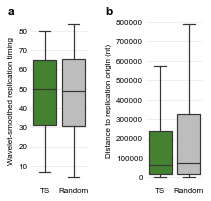

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(linewidth/2, linewidth/2))

sns.boxplot(x="ts_or_rand", y="timing", data=timing_df, ax=ax[0],
            palette=[ts_green, grey])
sns.boxplot(x="ts_or_rand", y="abs_origin_distance", data=origin_df,
            ax=ax[1], showfliers=False, 
            palette=[ts_green, grey])

#ax[1].set_ylim(top=700000)
x_offset = [-0.4,-0.7]

y_labs = ["Wavelet-smoothed replication timing", "Distance to replication origin (nt)"]

for n, a in enumerate(ax):
    a.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
            size=12, weight='bold')
    a.tick_params(axis='y', which='major', pad=-2)
    a.tick_params(axis='x', which='major', pad=-2)

    ax[n].set_xlabel("")
    ax[n].set_ylabel(y_labs[n])
    sns.despine(ax=ax[n], left=True, bottom=True)
    a.tick_params(axis="both",
                  which="both",
                  left=False, bottom=False)

for a in ax:
    a.yaxis.grid(color="#e0e0e0",
                 linewidth=border_width)
    a.set_axisbelow(True)

#fig.tight_layout()
plt.subplots_adjust(wspace=1)

plt.ticklabel_format(style='sci', axis='y')

# plt.savefig("replication_association.pdf",
#              bbox_inches="tight",
#              format="pdf")

In [2]:
# random_nucleo_df = pd.read_csv("data/nucleosome_occupancy/random_nucleosome_range_signal_trim.bed", sep="\t", header=None,
#                        names=["chrom", "start", "event_no", "coord", "signal"])
# random_nucleo_df["event_no"] = pd.to_numeric(pd.factorize(random_nucleo_df["event_no"])[0])
# random_ids = random_nucleo_df["event_no"].unique()

# random_list_of_nucleo_signals = []
# random_signal_mean = np.mean(random_nucleo_df["signal"])

# for i in random_ids:
#     tmp_list = [np.NaN] * 1001
#     sub_df = random_nucleo_df[random_nucleo_df["event_no"] == i]
#     sub_df = sub_df.drop_duplicates(subset='start', keep="first")
#     val_list = list(sub_df["signal"])
#     for sub_i,sub_j in enumerate(list(sub_df["coord"])):
#         if val_list[sub_i] > 1000:
#             val_list[sub_i] = random_signal_mean
#         tmp_list[sub_i] = val_list[sub_i]
#     random_list_of_nucleo_signals.append(tmp_list)

# random_nucleo_means = list(pd.DataFrame(random_list_of_nucleo_signals).mean())

In [19]:
# onek_nucleo_df = pd.read_csv("data/nucleosome_occupancy/final_population_range_signal.bed", sep="\t", header=None,
#                        names=["start", "event_no", "coord", "signal"])
# onek_nucleo_df["coord"] = onek_nucleo_df["coord"] + 500
# onek_nucleo_df["event_no"] = pd.to_numeric(pd.factorize(onek_nucleo_df["event_no"])[0])
# onek_nucleo_ids = onek_nucleo_df["event_no"].unique()

# onek_nucleo_df_list_of_nucleo_signals = []
# desc_signal_mean = np.mean(onek_nucleo_df["signal"])

# for i in onek_nucleo_ids:
#     tmp_list = [np.NaN] * 1001
#     sub_df = onek_nucleo_df[onek_nucleo_df["event_no"] == i]
#     sub_df = sub_df.drop_duplicates(subset='start', keep="first")
#     val_list = list(sub_df["signal"])
#     for sub_i,sub_j in enumerate(list(sub_df["coord"])):
#         tmp_list[sub_i] = val_list[sub_i]
#     onek_nucleo_df_list_of_nucleo_signals.append(tmp_list)

# onek_nucleo_means = list(pd.DataFrame(onek_nucleo_df_list_of_nucleo_signals).mean())

In [1]:
# fig,ax = plt.subplots(figsize=(linewidth/2,linewidth/2))

# onek_nucleo_means[0] = onek_nucleo_means[1]
# sns.lineplot(x=np.arange(0,len(random_nucleo_means)), y=random_nucleo_means,
#              linewidth=2, color="grey",
#              label="Random")
# sns.lineplot(x=np.arange(0,len(onek_nucleo_means)), y=onek_nucleo_means, linewidth=2,
#               color="darkblue",
#              label="1K Genomes events")

# plt.ylabel("Apparent occupancy")
# plt.xticks(np.arange(0,1001,500))
# ax.set_xticklabels([-500,"Switch point 1","+500"])
# plt.axvline(500, color="black", linestyle="--", linewidth=1)
# plt.legend()
# #plt.xlim(500,550)
# #nucleo_means
# #plt.axvline(523)
# plt.legend()
# sns.despine()

# plt.savefig("nucleosome_occupancy_vs_random.pdf", format="pdf",
#             facecolor="white", bbox_inches="tight")